In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
# Select features for clustering (Example: MonthlyHours and ElectricityBill)
X = df[['MonthlyHours', 'ElectricityBill']].values  # Select appropriate features

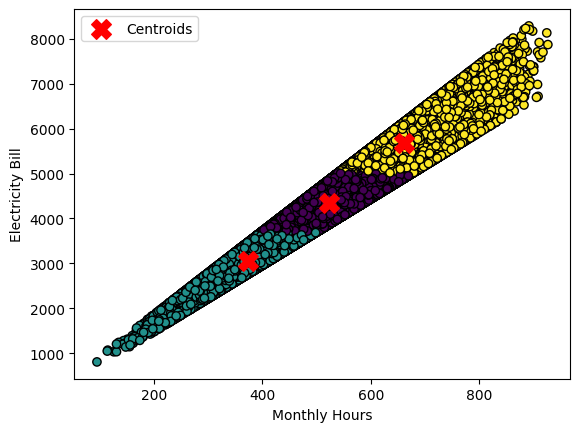

In [4]:
# Define number of clusters
k = 3  # Change as needed
# Define number of clusters
k = 3  # Change as needed
# Create and fit K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster labels
df['Cluster'] = kmeans.labels_

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.legend()
plt.show()


In [5]:
# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 522.62094591 4342.18673655]
 [ 373.82189715 3054.4003544 ]
 [ 661.31307378 5676.71881163]]


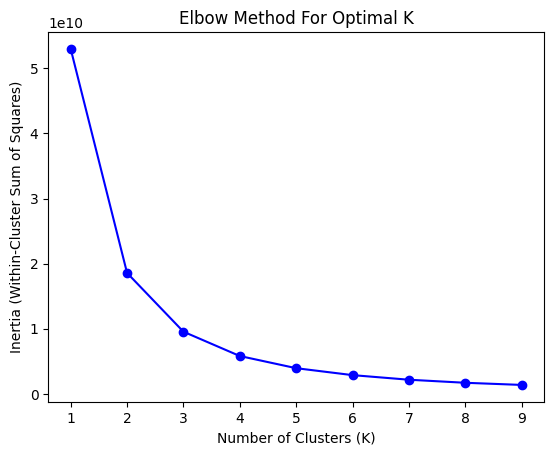

In [6]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for k={k}: {score:.2f}")


Silhouette Score for k=9: 0.50


In [8]:
cluster_summary = df.groupby('Cluster')[['MonthlyHours', 'ElectricityBill']].mean()
print("Cluster-wise Average Usage and Bill:")
print(cluster_summary)


Cluster-wise Average Usage and Bill:
         MonthlyHours  ElectricityBill
Cluster                               
0          522.897125      4344.801167
1          374.043521      3056.427766
2          661.577399      5678.940247


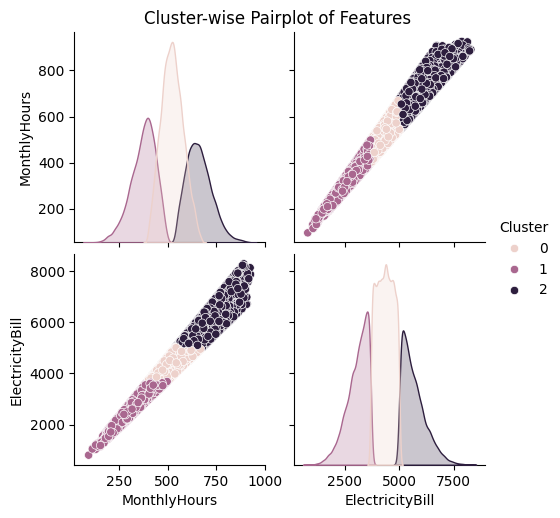

In [9]:
import seaborn as sns

sns.pairplot(df, hue='Cluster', vars=['MonthlyHours', 'ElectricityBill'])
plt.suptitle("Cluster-wise Pairplot of Features", y=1.02)
plt.show()
